# INSTALLATION:
### install bmad:
* `sudo dnf install rscode-bmad` 
    * I ran into conflicting file issues with this install. Here is how to resolve:
    * delete the conflicting ones `sudo dnf remove ...`  (DO NOT REMOVE RSCODE-COMMON THOUGH)
    * upgrade rscode-common `sudo dnf upgrade rscode-common`
    * reinstall the removed ones `sudo dnf install ...`
    * then `sudo dnf install rscode-bmad` worked
### Then install pytao 
* `gcl https://github.com/bmad-sim/pytao.git`
* `cd /pytao`
* `pip install -e .`
* (or just `pip install pytao`)

In [1]:
from pytao import Tao
from pmd_beamphysics import ParticleGroup
import matplotlib.pyplot as plt
import numpy as np

### Initialize sim
* initializes with init and lattice file

In [2]:
tao=Tao('-init tao.init -lat lat.bmad -noplot')

In [3]:
tao.cmd('show lat')

['# Values shown are for the Exit End of each Element:',
 '# Index  name      key                       s       l    beta   phi_a    eta   orbit    beta   phi_b    eta   orbit  Track',
 '#                                                            a   [2pi]      x  x [mm]       b   [2pi]      y  y [mm]  State',
 '      0  BEGINNING Beginning_Ele         0.000     ---   10.00   0.000   0.00   0.000   10.00   0.000   0.00   0.000  Alive',
 '      1  D#1       Drift                 1.200   1.200   10.14   0.019   0.00   0.000   10.14   0.019   0.00   0.000  Alive',
 '      2  Q1        Quadrupole            1.300   0.100   10.07   0.021   0.00   0.000   10.27   0.021   0.00   0.000  Alive',
 '      3  D#2       Drift                 1.700   0.400    9.39   0.027   0.00   0.000   11.23   0.026   0.00   0.000  Alive',
 '      4  Q2        Quadrupole            1.800   0.100    9.32   0.029   0.00   0.000   11.37   0.028   0.00   0.000  Alive',
 '      5  D#3       Drift                 2.20

### Run sim
* Now the sim is set up, use `call` to run the sim (this one is quick)

In [4]:
tao.cmd('call beam.tao -noplot')

['', 'Tao: np 2000', '', 'Tao: beamon', '', 'Tao: place layout none']

In [5]:
tao.lat_ele_list()

['BEGINNING',
 'D#1',
 'Q1',
 'D#2',
 'Q2',
 'D#3',
 'Q3',
 'D#4',
 'Q4',
 'D#5',
 'Q5',
 'D#6',
 'Q6',
 'D#7',
 'END']

In [6]:
tao.bunch_params('END')['beam_saved']

True

In [7]:
data = tao.bunch_data('end')
data.keys()

dict_keys(['x', 'px', 'y', 'py', 't', 'pz', 'status', 'weight', 'z', 'species'])

In [8]:
def show_heat_plot(xcol, ycol):
    hist, edges = np.histogramdd([data[xcol], data[ycol]], 100)
    plt.imshow(
        hist.T.tolist(),
        cmap='viridis'
    )

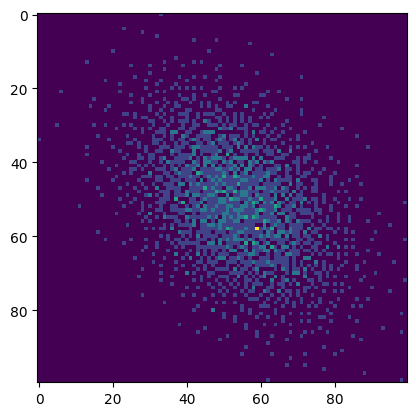

In [9]:
show_heat_plot("x", "px")

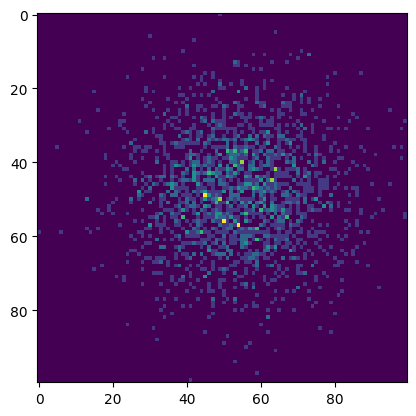

In [10]:
show_heat_plot("x", "y")

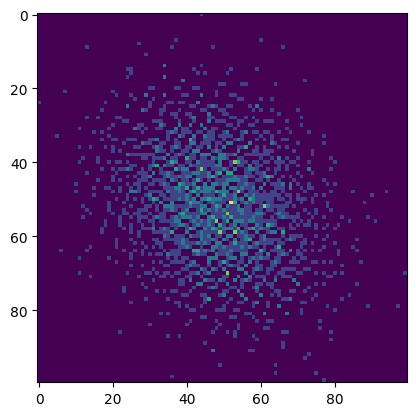

In [11]:
show_heat_plot("y", "py")

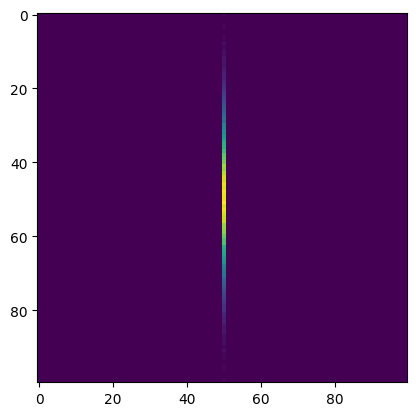

In [12]:
show_heat_plot("z", "pz")

### You can use ParticleGroup to get sigma_x and sigma_y for beam param plotting

In [13]:
names = [name.strip().lower() for name in tao.lat_ele_list()]
groups = []
for name in names:
    groups.append(ParticleGroup(data=tao.bunch_data(name.lower())))

In [14]:
sx = [p["sigma_x"] for p in groups]
sy = [p["sigma_y"] for p in groups]
m = [p["mean_t"] for p in groups]

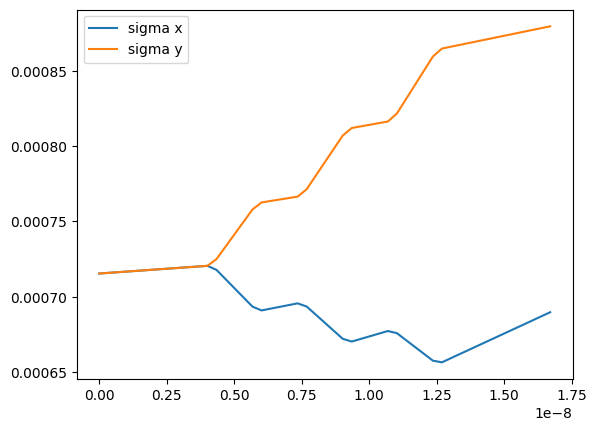

In [15]:
plt.plot(m, sx, label='sigma x')
plt.plot(m, sy, label='sigma y')
plt.legend()